In [21]:
import numpy as np
import scipy.integrate as ode
import random as rd
import os
import time
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.colorbar as mcolorbar
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import gridspec

import use_function as f

# ODE function
def repressilator(t,z):
    x,x1,x2=z
    dxdt=alpha*np.sin(t+phi)+alpha+beta/(1+(x2**n)) - d*x
    dx1dt=beta/(1+(x**n)) - d*x1
    dx2dt=beta/(1+(x1**n)) - d*x2
    return [dxdt,dx1dt,dx2dt]

The function is given by
$$\frac{dx}{dt}=\alpha(t)+\beta\frac{1}{1+x_2^n}-dx$$
$$\frac{dx_1}{dt}=\beta\frac{1}{1+x^n}-dx_1$$
$$\frac{dx_2}{dt}=\beta\frac{1}{1+x_1^n}-dx_2$$

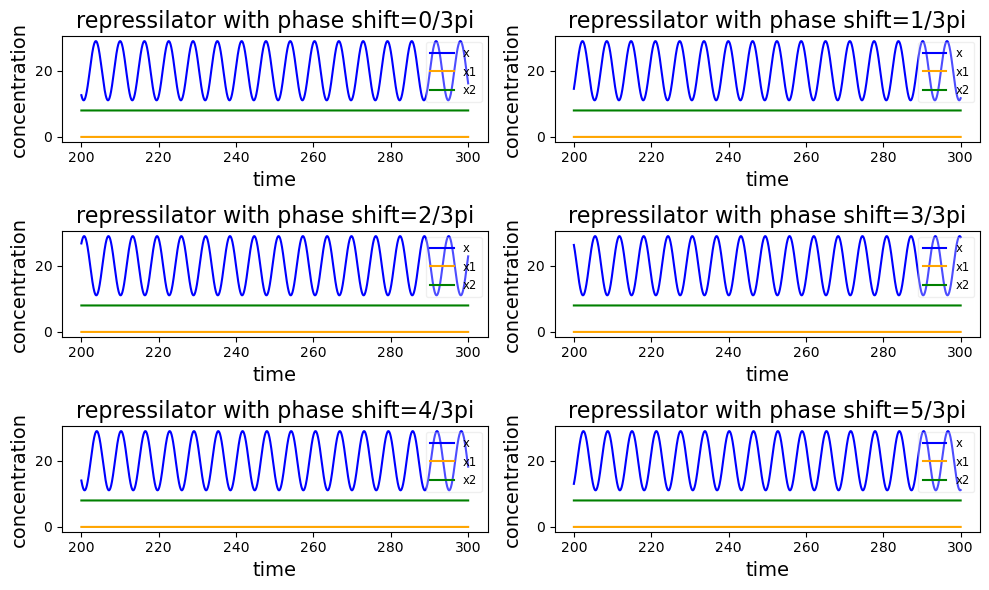

In [22]:
simu_time=300
start_sampling_time=200
timespan=(0,simu_time)
z0=[1.5,0,0]
alpha=10    # external regulation
n=3         # hill coef
d=0.5       # degradation
beta=4      # hill constant
phi=0.5*np.pi  # phase shift

results:list[any]=[None]*7
plt.figure(figsize=(10, 6))
for i in range(0,6):
    phi=i/6*9.065
    results[i]=ode.solve_ivp(repressilator, timespan, z0, t_eval=np.linspace(start_sampling_time,simu_time,(simu_time-start_sampling_time)*100+1), method='RK45', rtol=1e-6, atol=1e-9)
    plt.subplot(3, 2, i+1)
    plt.plot(results[i].t, results[i].y[0], label='x', color='blue', linestyle='-')  # 蓝色实线
    plt.plot(results[i].t, results[i].y[1], label='x1', color='orange', linestyle='-')  # 橙色虚线
    plt.plot(results[i].t, results[i].y[2], label='x2', color='green', linestyle='-')  # 绿色点划线
    plt.title('repressilator with phase shift='+str(i)+'/3pi', fontsize=16)
    plt.xlabel('time', fontsize=14)
    plt.ylabel('concentration', fontsize=14)
    plt.legend(loc='upper right',fontsize='small',framealpha=0.3)

plt.tight_layout()
plt.show()

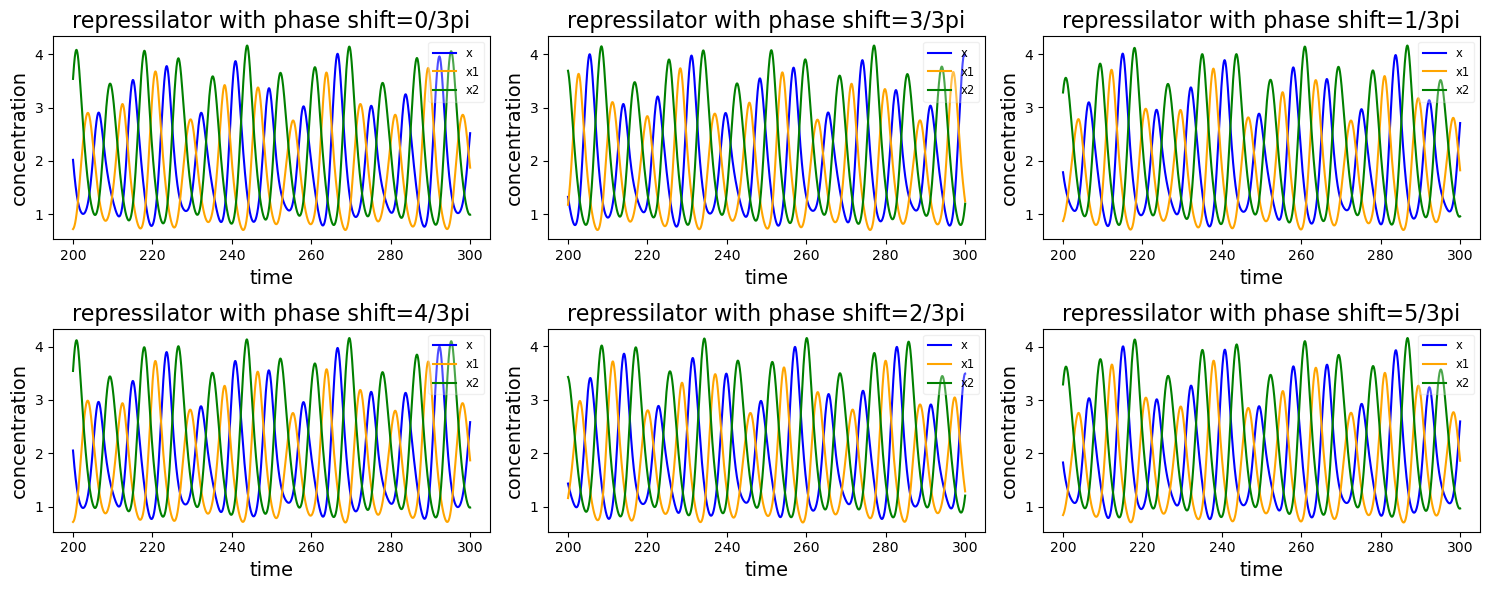

In [23]:
# small definition difference of period
simu_time=300
start_sampling_time=200
timespan=(0,simu_time)
z0=[1.5,0,0]
alpha=0.15     # external regulation
n=3         # hill coef
d=0.5       # degradation
beta=4      # hill constant
phi=0.5*np.pi  # phase shift

results:list[any]=[None]*7
plt.figure(figsize=(15, 6))
seq=[1,3,5,2,4,6]
for i in range(0,6):
    phi=i/6*(9.06+(i%2)*0.01)
    results[i]=ode.solve_ivp(repressilator, timespan, z0, t_eval=np.linspace(start_sampling_time,simu_time,(simu_time-start_sampling_time)*100+1), method='RK45', rtol=1e-6, atol=1e-9)
    plt.subplot(2, 3, seq[i])
    plt.plot(results[i].t, results[i].y[0], label='x', color='blue', linestyle='-')  # 蓝色实线
    plt.plot(results[i].t, results[i].y[1], label='x1', color='orange', linestyle='-')  # 橙色虚线
    plt.plot(results[i].t, results[i].y[2], label='x2', color='green', linestyle='-')  # 绿色点划线
    plt.title('repressilator with phase shift='+str(i)+'/3pi', fontsize=16)
    plt.xlabel('time', fontsize=14)
    plt.ylabel('concentration', fontsize=14)
    plt.legend(loc='upper right',fontsize='small',framealpha=0.3)

plt.tight_layout()
plt.show()

Now we want to know at which point the oscillator will decay.

The change of the behaviour of the repressilator against transcriptional regulation is shown by Amp-$\alpha$ diagram.

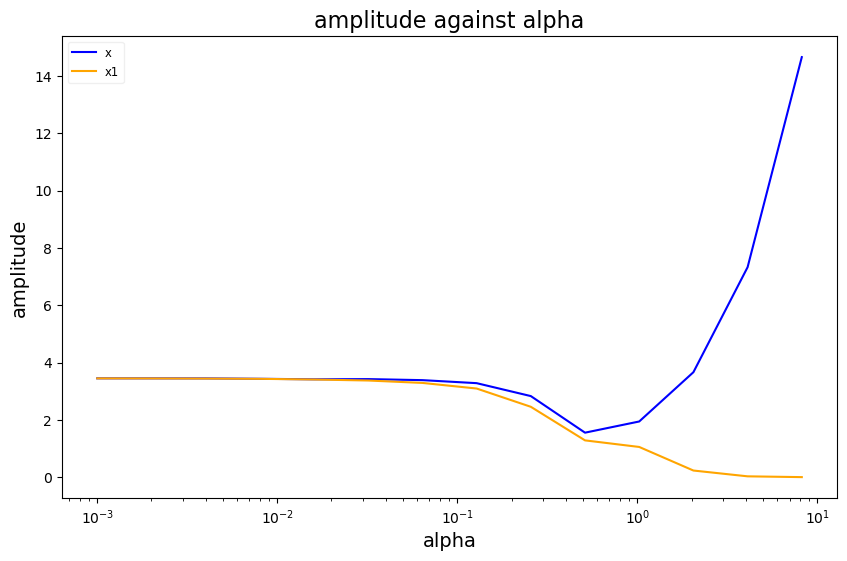

: 

In [ ]:
simu_time=3000
start_sampling_time=1000
timespan=(0,simu_time)
z0=[1.5,0,0]
n=3         # hill coef
d=0.5       # degradation
beta=4      # hill constant
phi=0.5*np.pi  # phase shift

alpha_min=1e-3
folds=14

alpha_max=(2**folds)*alpha_min
alpha_list=[None]*folds
for i in range(0,folds):
    alpha_list[i]=alpha_min*(2**i)

results:list[any]=[None]*folds
amp=[None]*folds
amp1=[None]*folds
#plt.figure(figsize=(10, 6))
for i in range(0,folds):
    alpha=alpha_list[i]
    results[i]=ode.solve_ivp(repressilator, timespan, z0, t_eval=np.linspace(start_sampling_time,simu_time,(simu_time-start_sampling_time)*100+1), method='RK45', rtol=1e-6, atol=1e-9)
    amp[i]=f.find_amplitude(results[i].y[0])
    amp1[i]=f.find_amplitude(results[i].y[1])
    """ plt.subplot(3, 6, i+1)
    plt.plot(results[i].t, results[i].y[0], label='x', color='blue', linestyle='-')  # 蓝色实线
    plt.plot(results[i].t, results[i].y[1], label='x1', color='orange', linestyle='-')  # 橙色虚线
    plt.plot(results[i].t, results[i].y[2], label='x2', color='green', linestyle='-')  # 绿色点划线
    plt.title('repressilator with phase shift='+str(i)+'/3pi', fontsize=16)
    plt.xlabel('time', fontsize=14)
    plt.ylabel('concentration', fontsize=14)
    plt.legend(loc='upper right',fontsize='small',framealpha=0.3) """
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)
plt.plot(alpha_list, amp, label='x', color='blue', linestyle='-')  # 蓝色实线
plt.plot(alpha_list, amp1, label='x1', color='orange', linestyle='-')  # 橙色虚线
plt.xscale('log')
plt.xlabel('alpha', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.legend(loc='upper left',fontsize='small',framealpha=0.3)
plt.title('amplitude against alpha', fontsize=16)
plt.show()